In [18]:
from qiskit import QuantumRegister, QuantumCircuit
import sys

if not '../' in sys.path:
    sys.path.insert(1, '../')

In [19]:
from helperfunctions.graphhelper import node_attr, edge_attr
from helperfunctions.circuitgraphfunctions import get_computation_graph, get_uncomp_circuit
from helperfunctions.uncompfunctions import add_uncomputation, exhaustive_uncomputation, greedy_uncomputation_full, greedy_uncomputation_partial
from helperfunctions.randomcircuit import get_ancillas_of_circuit

from rustworkx.visualization import graphviz_draw

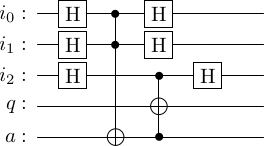

In [20]:
circ = QuantumCircuit(QuantumRegister(3,'i'), QuantumRegister(1,'q'), QuantumRegister(1,'a'))
for i in range(3):
    circ.h(i)
circ.ccx(0,1,4)
circ.ccx(2,4,3)
# circ.barrier()
for i in range(3):
    circ.h(i)

circ.draw('latex', plot_barriers=False)

Adding Nodes for Circuit: 100%|██████████| 8/8 [00:00<00:00, 68900.27it/s]


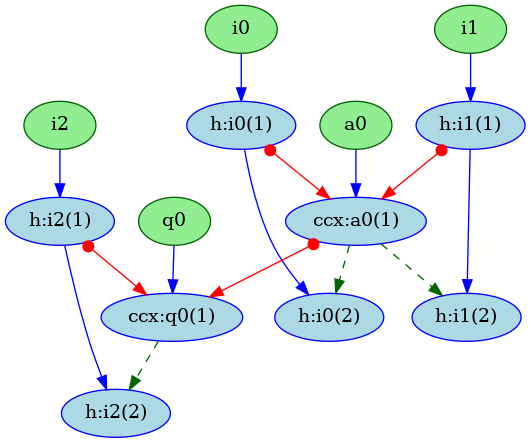

In [21]:
anc = ['a0', 'a1']
cg = get_computation_graph(circ, anc)
graphviz_draw(cg, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='dot')

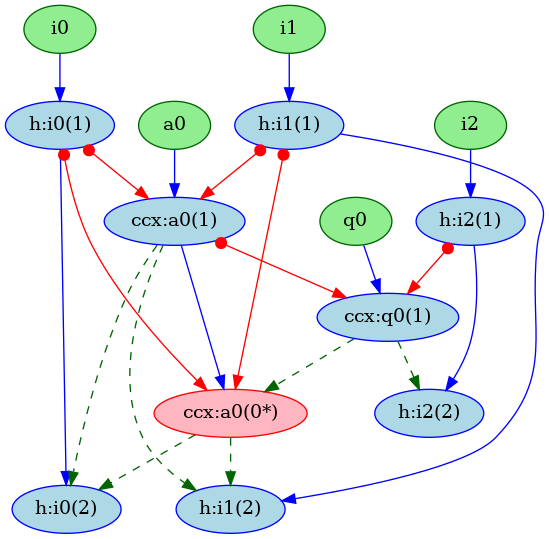

In [22]:
ucg, cycle = add_uncomputation(cg, anc)
if cycle:
    print(f'UCG HAS CYCLE??')
graphviz_draw(ucg, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='dot')

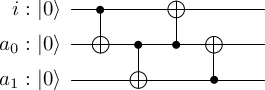

In [23]:
gp_comp_circ = QuantumCircuit(QuantumRegister(1,'i'), QuantumRegister(2,'a'))
gp_comp_circ.cx(0,1)
gp_comp_circ.cx(1,2)
gp_comp_circ.cx(1,0)
gp_comp_circ.cx(2,1)




gp_comp_circ.draw('latex', initial_state=True)

In [24]:
alist = get_ancillas_of_circuit(gp_comp_circ, 2)
print(alist)


['a0', 'a1']


Adding Nodes for Circuit: 100%|██████████| 4/4 [00:00<00:00, 41838.44it/s]


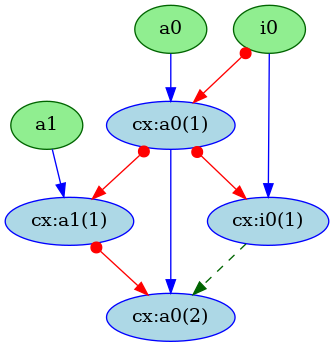

In [25]:
cg = get_computation_graph(gp_comp_circ, alist)

graphviz_draw(cg, node_attr_fn=node_attr, edge_attr_fn=edge_attr)

Checking Out Exhaustive Uncomp for All Ancillas: 4it [00:00, 3726.61it/s]


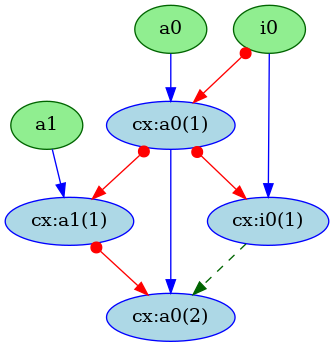

In [26]:
ex_cg = exhaustive_uncomputation(cg, alist)
graphviz_draw(ex_cg, node_attr_fn=node_attr, edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 7/7 [00:00<00:00, 46826.36it/s]


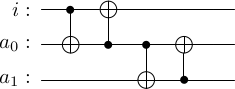

In [27]:
get_uncomp_circuit(ex_cg).draw('latex')

Iterating over all cycles in graph:   0%|          | 3/100000 [00:00<00:01, 55676.60it/s]


a0 5


Iterating over all cycles in graph:   0%|          | 1/100000 [00:00<00:05, 19972.88it/s]

a1 1


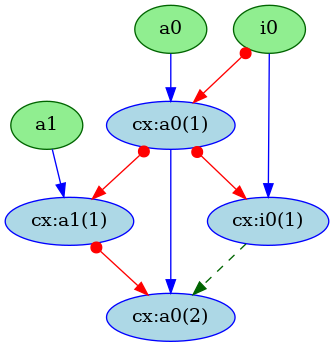

In [37]:
gf_cg = greedy_uncomputation_full(cg, alist)

graphviz_draw(gf_cg, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='dot')

Building uncomp circuit from circuit graph: 100%|██████████| 7/7 [00:00<00:00, 51150.05it/s]


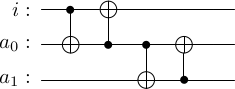

In [29]:
get_uncomp_circuit(gf_cg).draw('latex')

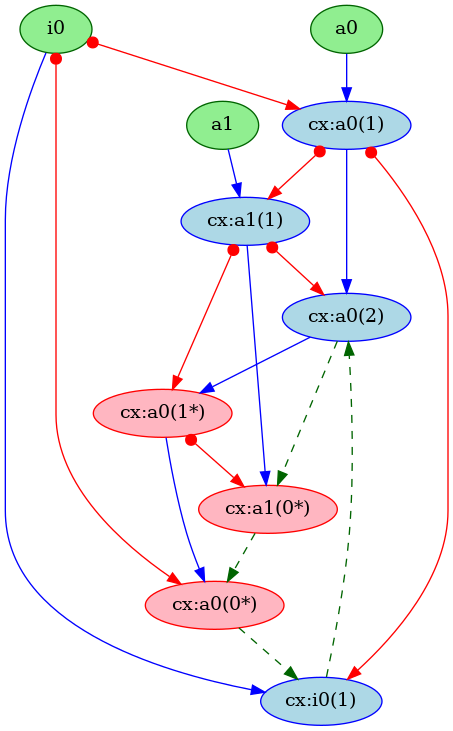

In [30]:
cyclic_uncomp_circ, cycle = add_uncomputation(cg, alist, allow_cycle=True)
graphviz_draw(cyclic_uncomp_circ, node_attr_fn=node_attr, edge_attr_fn=edge_attr)

Iterating over all cycles:   0%|          | 3/100000 [00:00<00:02, 36792.14it/s]

a0 5


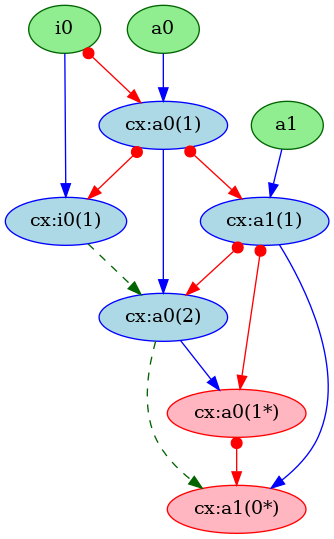

In [31]:
gp_cg = greedy_uncomputation_partial(cg, alist)

graphviz_draw(gp_cg, node_attr_fn=node_attr, edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 9/9 [00:00<00:00, 72177.32it/s]


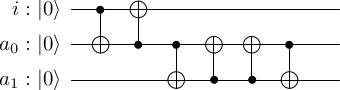

In [32]:
get_uncomp_circuit(gp_cg).draw('latex', initial_state=True)